# 1. Install and Import Dependencies

https://github.com/PaddlePaddle/PaddleOCR


1. paddlepaddle 
2. paddleOCR
3. paddle OCR repo 클론 -> font for visualization

In [3]:
!python -m pip install paddlepaddle-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 MB 10.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 59.7 MB/s eta 0:00:00


In [4]:
# install paddle OCR 
!pip install "paddleocr>=2.0.1"

  Using cached paddleocr-2.6.1.3-py3-none-any.whl (445 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 39.5 MB/s eta 0:00:00
  Using cached pdf2docx-0.5.6-py3-none-any.whl (148 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 24.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached python-docx-0.8.11.tar.gz (5.6 MB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.0 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached visualdl-2.5.3-py3-none-any.whl (6.3 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)
  Using cached fire-0.5.0.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
  Using cached premailer-3.10.0-py2.py3-none-any.whl (19 kB)
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (67.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116931 sha256=51ee7517e703b3926f43faf167795ffc2bec4a1f1124be76cf9781b991ed834f
  Stored in directory: /home/minyoungxi/.cache/pip/wheels/c4/eb/6a/1c6d2ad660043768e998bdf9c6a28db2f1b7db3a5825d51e87
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184490 sha256=2bdcfb156263dc63a0aca05c51bd10ba3fa4a91ae55b8b49a0188d91c67efce9
  Stored in directory: /home/minyoungxi/.cache/pip/wheels/65/e1/9b/0c38fe6cfe02a9fe31cb6b4efd90985f17354d7f77872f2def
Successfully built fire python-docx
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72
  Attempting uninstall: Babel
    Found existing installation: Babel 2.11.0
    Uninstalling Babel-2.11.0:
      Successfully uninstalled Babel-2.11.0


In [8]:
# Clone paddle OCR Repo

!git clone https://github.com/PaddlePaddle/PaddleOCR 

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 46611, done.
remote: Counting objects: 100% (462/462), done.
remote: Compressing objects: 100% (278/278), done.
remote: Total 46611 (delta 256), reused 317 (delta 178), pack-reused 46149
Receiving objects: 100% (46611/46611), 342.94 MiB | 22.60 MiB/s, done.
Resolving deltas: 100% (32716/32716), done.


In [1]:
import torch

torch.cuda.is_available()

True

In [2]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2 
import os

## Instantiate Model and Detect

In [5]:
# Setup

ocr_model = PaddleOCR(lang="en")

[2023/07/05 22:34:37] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/minyoungxi/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/minyoungxi/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_

In [80]:
img_path = os.path.join('.', 'drug3.jpg')
img_path

'./drug3.jpg'

In [81]:
result = ocr_model.ocr(img_path)

[2023/07/05 22:59:06] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/07/05 22:59:06] ppocr DEBUG: dt_boxes num : 30, elapse : 0.029927968978881836
[2023/07/05 22:59:06] ppocr DEBUG: rec_res num  : 30, elapse : 0.017934322357177734


In [82]:
result

[[[[[77.0, 35.0], [95.0, 35.0], [95.0, 53.0], [77.0, 53.0]],
   ('a', 0.8006287813186646)],
  [[[662.0, 35.0], [680.0, 35.0], [680.0, 54.0], [662.0, 54.0]],
   ('a', 0.5157121419906616)],
  [[[802.0, 162.0], [830.0, 162.0], [830.0, 188.0], [802.0, 188.0]],
   ('a', 0.9991470575332642)],
  [[[20.0, 327.0], [120.0, 254.0], [141.0, 283.0], [41.0, 356.0]],
   ('alamy', 0.9972496032714844)],
  [[[539.0, 332.0], [752.0, 197.0], [775.0, 234.0], [563.0, 370.0]],
   ('Pharmacy', 0.991461992263794)],
  [[[1097.0, 417.0], [1128.0, 417.0], [1128.0, 447.0], [1097.0, 447.0]],
   ('a', 0.9972540736198425)],
  [[[525.0, 485.0], [848.0, 254.0], [873.0, 290.0], [550.0, 521.0]],
   ('AMOXICILLIN 500 MGC', 0.954144299030304)],
  [[[370.0, 551.0], [389.0, 551.0], [389.0, 574.0], [370.0, 574.0]],
   ('a', 0.9973932504653931)],
  [[[575.0, 551.0], [992.0, 254.0], [1018.0, 291.0], [601.0, 588.0]],
   ('TAKE ONE CAPSULEHalamy', 0.8975727558135986)],
  [[[602.0, 599.0], [915.0, 371.0], [943.0, 409.0], [630.0, 6

In [83]:
result[0][0][0] # box coords

[[77.0, 35.0], [95.0, 35.0], [95.0, 53.0], [77.0, 53.0]]

In [84]:
type(result)

list

In [85]:
type(result[0][0][1]) # tuple

tuple

In [86]:
print(result[0][0][1][0]) # 아래 이미지에서 RX 부분 추출
print(result[0][1][1][0]) # 50 MCG TABLES 추출

a
a


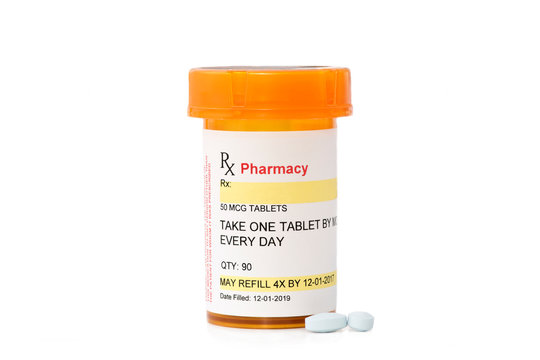

In [87]:
# loop : 약통에서 text만 추출

for res in result[0]:
    print(res[1][0])

a
a
a
alamy
Pharmacy
a
AMOXICILLIN 500 MGC
a
TAKE ONE CAPSULEHalamy
MOUTH 2X PER DAY
DAYS
a
QTY:20
No Refillsy Dr.Auth Required
20
Date Filled:12-01-2016
a
a
a
alamy stock photo
HDE30E
www.alamy.com


In [88]:
[res[1][0] for res in result[0]]

['a',
 'a',
 'a',
 'alamy',
 'Pharmacy',
 'a',
 'AMOXICILLIN 500 MGC',
 'a',
 'TAKE ONE CAPSULEHalamy',
 'MOUTH 2X PER DAY',
 'DAYS',
 'a',
 'QTY:20',
 'No Refillsy Dr.Auth Required',
 '20',
 'Date Filled:12-01-2016',
 'a',
 'a',
 'a',
 'alamy stock photo',
 'HDE30E',
 'www.alamy.com']

## Visualize

In [89]:
boxes = [res[0] for res in result[0]] # 바운딩 박스 -> 객체 감지
texts = [res[1][0] for res in result[0]] # 텍스트
scores = [res[1][1] for res in result[0]] # confidence 스코어

##### draw_ocr을 사용하기 위해서는 특정 font가 필요하기 때문에 github를 clone한 것

In [90]:
# Specifying font path for draw_ocr method 
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')
font_path

'PaddleOCR/doc/fonts/latin.ttf'

In [91]:
# import image - drug 1 2 3

img = cv2.imread(img_path,1) # imread option에서 1은 color, 0는 gray scale
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [250, 250, 250]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [251, 251, 251],
        [249, 249, 249]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [248, 248, 248],
        [250, 250, 250]],

       ...,

       [[ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50],
        ...,
        [ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50]],

       [[ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50],
        ...,
        [ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50]],

       [[ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50],
        ...,
        [ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50]]

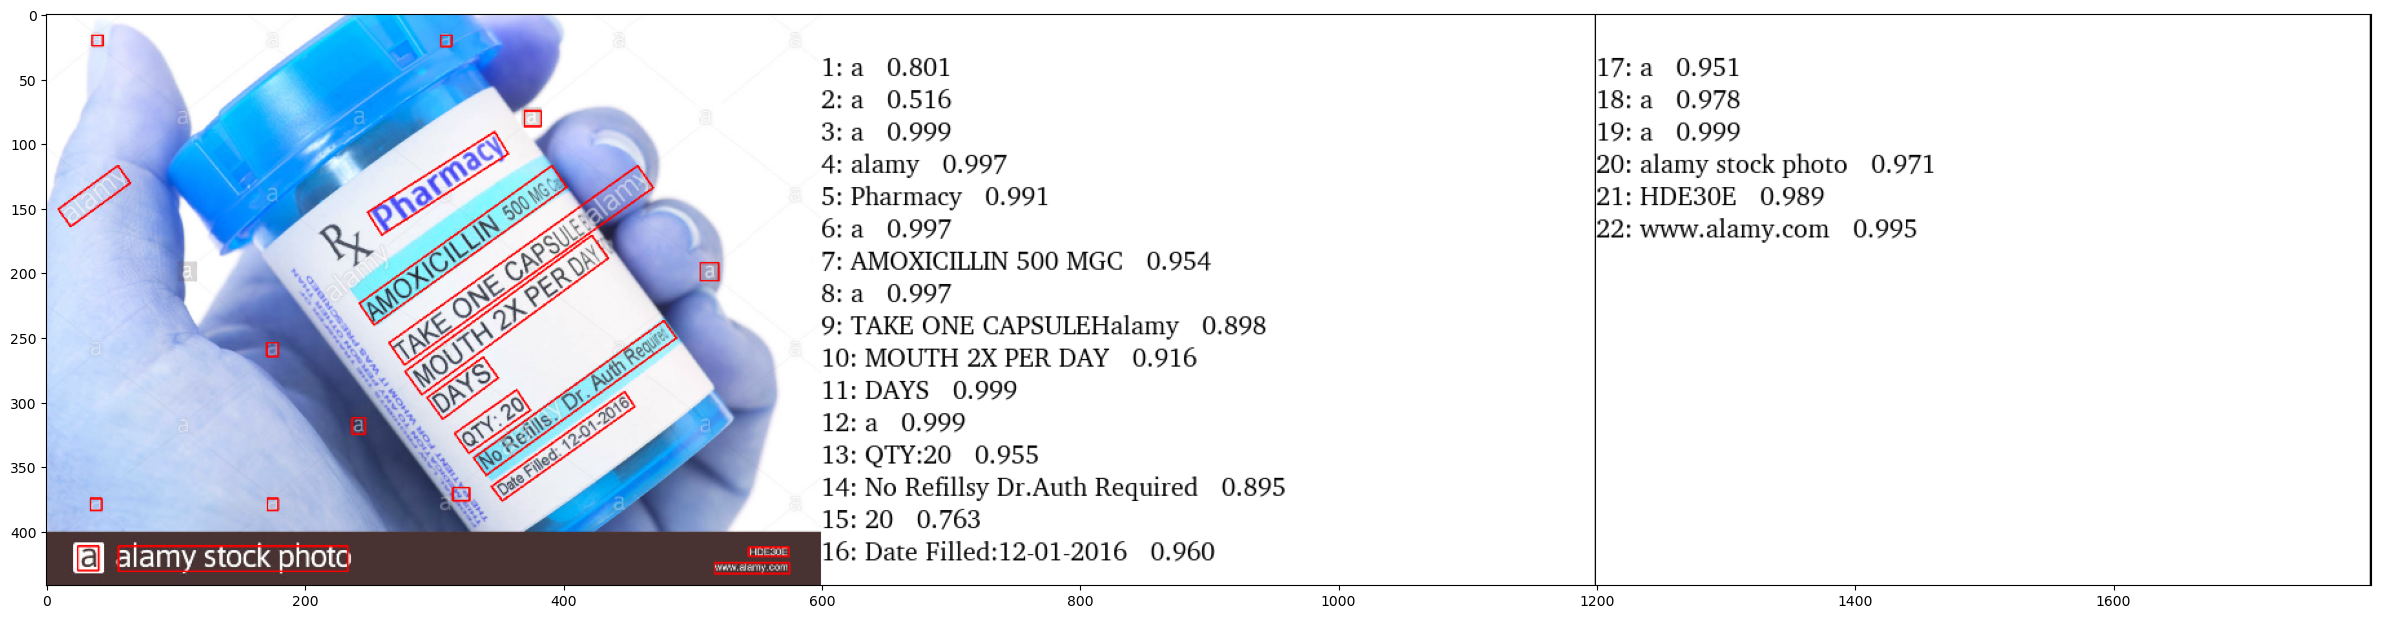

In [92]:
# Visualize our image and detection
# resizing image

plt.figure(figsize=(30,30)) 
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) # draw annotations on image
plt.imshow(annotated)

In [78]:
img.shape

(400, 800, 3)

## 한국어 모델

In [94]:
ocr_model = PaddleOCR(lang="korean")

download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_infer.tar to /home/minyoungxi/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer/Multilingual_PP-OCRv3_det_infer.tar


100%|█████████████████████████████████████| 3.85M/3.85M [00:01<00:00, 2.23MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/korean_PP-OCRv3_rec_infer.tar to /home/minyoungxi/.paddleocr/whl/rec/korean/korean_PP-OCRv3_rec_infer/korean_PP-OCRv3_rec_infer.tar


100%|█████████████████████████████████████| 10.9M/10.9M [00:10<00:00, 1.02MiB/s]

[2023/07/05 23:00:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/minyoungxi/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/minyoungxi/.paddleocr/whl/rec/korean/korean_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_le

In [146]:
img_path = os.path.join('.', 'drug4.jpg')
img_path

'./drug4.jpg'

In [147]:
result = ocr_model.ocr(img_path,1)

[2023/07/05 23:10:13] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/07/05 23:10:13] ppocr DEBUG: dt_boxes num : 12, elapse : 0.020694971084594727
[2023/07/05 23:10:13] ppocr DEBUG: rec_res num  : 12, elapse : 0.010741472244262695


In [148]:
result

[[[[[430.0, 88.0], [488.0, 88.0], [488.0, 99.0], [430.0, 99.0]],
   ('[됨반의막푼]', 0.7205267548561096)],
  [[[208.0, 114.0], [467.0, 119.0], [466.0, 180.0], [207.0, 176.0]],
   ('다이레술', 0.6174060106277466)],
  [[[473.0, 143.0], [493.0, 151.0], [482.0, 179.0], [462.0, 171.0]],
   ('정', 0.942317008972168)],
  [[[200.0, 193.0], [299.0, 193.0], [299.0, 227.0], [200.0, 227.0]],
   ('500', 0.9990296363830566)],
  [[[302.0, 197.0], [396.0, 201.0], [395.0, 230.0], [301.0, 227.0]],
   ('밀리그람', 0.9674642086029053)],
  [[[197.0, 229.0], [287.0, 229.0], [287.0, 246.0], [197.0, 246.0]],
   ('아서트아미노핀', 0.87082439661026)],
  [[[198.0, 246.0], [226.0, 246.0], [226.0, 258.0], [198.0, 258.0]],
   ('여질에가', 0.515792727470398)],
  [[[289.0, 245.0], [328.0, 245.0], [328.0, 256.0], [289.0, 256.0]],
   ('수명미신시도', 0.5218389630317688)],
  [[[400.0, 260.0], [447.0, 260.0], [447.0, 283.0], [400.0, 283.0]],
   ('10정', 0.9865720272064209)]]]

In [149]:
boxes = [res[0] for res in result[0]] # 바운딩 박스 -> 객체 감지
texts = [res[1][0] for res in result[0]] # 텍스트
scores = [res[1][1] for res in result[0]] # confidence 스코어

In [150]:
img = cv2.imread(img_path,1) # imread option에서 1은 color, 0는 gray scale
img

array([[[242, 230, 230],
        [242, 230, 230],
        [242, 230, 230],
        ...,
        [205, 194, 196],
        [206, 195, 197],
        [206, 195, 197]],

       [[242, 230, 230],
        [242, 230, 230],
        [242, 230, 230],
        ...,
        [205, 194, 196],
        [206, 195, 197],
        [206, 195, 197]],

       [[242, 230, 230],
        [242, 230, 230],
        [242, 230, 230],
        ...,
        [205, 194, 196],
        [206, 195, 197],
        [206, 195, 197]],

       ...,

       [[205, 207, 207],
        [205, 207, 207],
        [205, 207, 207],
        ...,
        [198, 203, 202],
        [197, 202, 201],
        [197, 202, 201]],

       [[204, 206, 206],
        [205, 207, 207],
        [206, 208, 208],
        ...,
        [197, 202, 201],
        [197, 202, 201],
        [197, 202, 201]],

       [[204, 206, 206],
        [205, 207, 207],
        [206, 208, 208],
        ...,
        [197, 202, 201],
        [196, 201, 200],
        [196, 201, 200]]

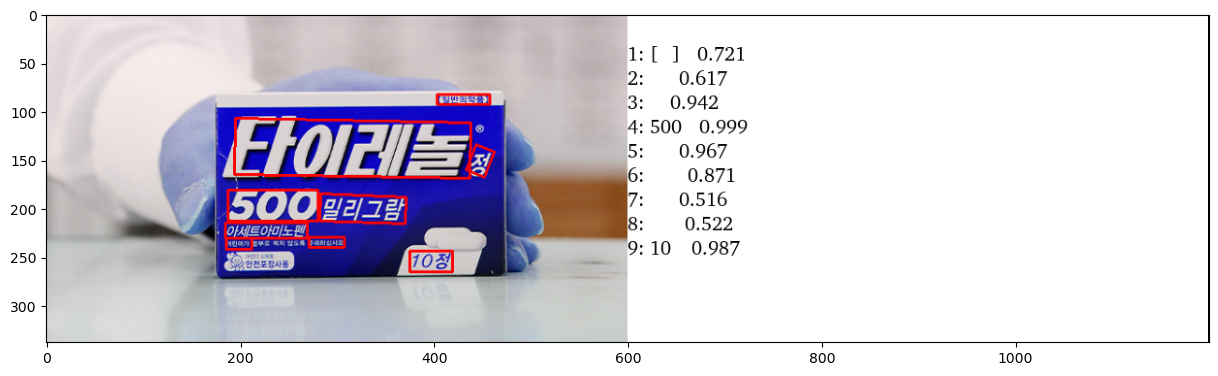

In [151]:
plt.figure(figsize=(15,15)) 
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) # draw annotations on image
plt.imshow(annotated)